Starting at [0 0], number of iterations: 3
Starting at [1 1], number of iterations: 8
Starting at [-1 -1], number of iterations: 6
Starting at [ 3 -2], number of iterations: 13
Starting at [10 -3], number of iterations: 23


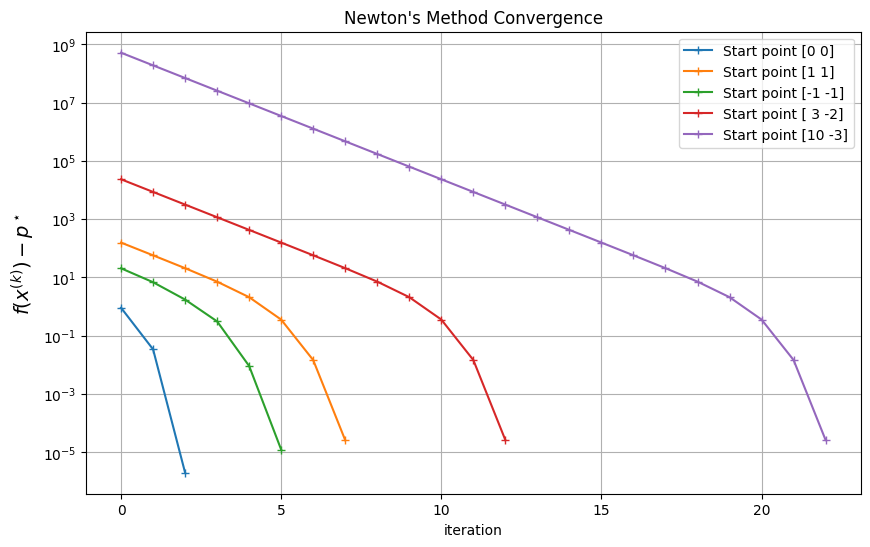

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    x1, x2 = x[0], x[1]
    return np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) + np.exp(-x1 - 0.1)

def grad_f(x):
    x1, x2 = x[0], x[1]
    df_dx1 = np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) - np.exp(-x1 - 0.1)
    df_dx2 = 3*np.exp(x1 + 3*x2 - 0.1) - 3*np.exp(x1 - 3*x2 - 0.1)
    return np.array([df_dx1, df_dx2])

def hess_f(x):
    x1, x2 = x[0], x[1]
    h11 = np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 3*x2 - 0.1) + np.exp(-x1 - 0.1)
    h12 = 3*np.exp(x1 + 3*x2 - 0.1) - 3*np.exp(x1 - 3*x2 - 0.1)
    h22 = 9*np.exp(x1 + 3*x2 - 0.1) + 9*np.exp(x1 - 3*x2 - 0.1)
    return np.array([[h11, h12], [h12, h22]])

def newton_method(x0, tol=1e-10, max_iters=50):
    x = x0.copy()
    errors = []
    
    for k in range(max_iters):
        g = grad_f(x)
        H = hess_f(x)
        
        if np.linalg.norm(g) < tol:
            break
        
        delta_x = -np.linalg.solve(H, g)
        x = x + delta_x
        
        errors.append(np.linalg.norm(g))
    
    return x, errors

x_list = [
    np.array([0, 0]),
    np.array([1, 1]),
    np.array([-1, -1]),
    np.array([3, -2]),
    np.array([10, -3])
]

plt.figure(figsize=(10,6))
for x0 in x_list:
    _, errors = newton_method(x0)
    print(f'Starting at {x0}, number of iterations: {len(errors)}')
    plt.semilogy(errors, marker='+', label=f'Start point {x0}')
    
plt.title('Newton\'s Method Convergence')
plt.xlabel('iteration')
plt.ylabel(r'$f(x^{(k)}) - p^\star$', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
